In [745]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score

In [746]:
data = pd.read_csv('insurance.csv')

In [747]:
print(data.shape)

(1338, 7)


In [748]:
data.replace({'sex':{'male':1,'female':0}}, inplace=True)


In [749]:
data.replace({'smoker':{'yes':1, 'no':0}}, inplace=True)

In [750]:
 
data.replace({'region':{'northeast':0, 'northwest':1, 'southeast':2, 'southwest':3}}, inplace=True)

In [751]:
data.iloc[:,:-1]
data.iloc[:,:-1]

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [752]:
print(data.head(20))

    age  sex     bmi  children  smoker  region      charges
0    19    0  27.900         0       1       3  16884.92400
1    18    1  33.770         1       0       2   1725.55230
2    28    1  33.000         3       0       2   4449.46200
3    33    1  22.705         0       0       1  21984.47061
4    32    1  28.880         0       0       1   3866.85520
5    31    0  25.740         0       0       2   3756.62160
6    46    0  33.440         1       0       2   8240.58960
7    37    0  27.740         3       0       1   7281.50560
8    37    1  29.830         2       0       0   6406.41070
9    60    0  25.840         0       0       1  28923.13692
10   25    1  26.220         0       0       0   2721.32080
11   62    0  26.290         0       1       2  27808.72510
12   23    1  34.400         0       0       3   1826.84300
13   56    0  39.820         0       0       2  11090.71780
14   27    1  42.130         0       1       2  39611.75770
15   19    1  24.600         1       0  

In [753]:
print(data.dtypes.head())

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
dtype: object


In [754]:
print(data.isnull().sum())


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [755]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


C:\Users\Eng_Dina\AppData\Local\Temp\ipykernel_10488\1203418784.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["age"])


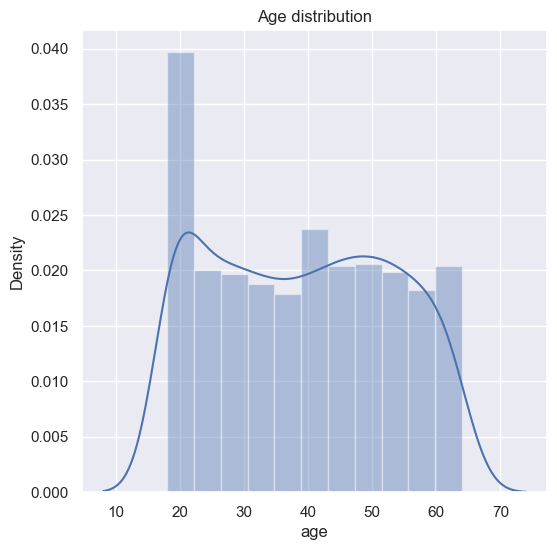

In [756]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data["age"])
plt.title("Age distribution")
plt.show()

In [757]:
data['age'].value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

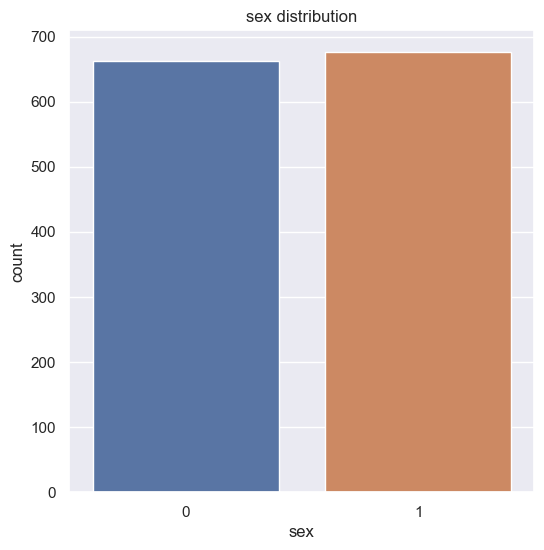

In [758]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data = data)
plt.title("sex distribution")
plt.show()
#  1--> male 
#  0--> female

In [759]:
data['sex'].value_counts()

1    676
0    662
Name: sex, dtype: int64

C:\Users\Eng_Dina\AppData\Local\Temp\ipykernel_10488\728534172.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["bmi"])


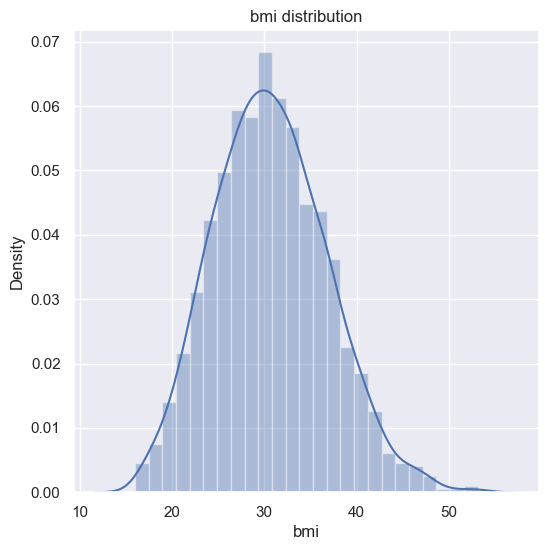

In [760]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data["bmi"])
plt.title("bmi distribution")
plt.show()

In [761]:
data['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

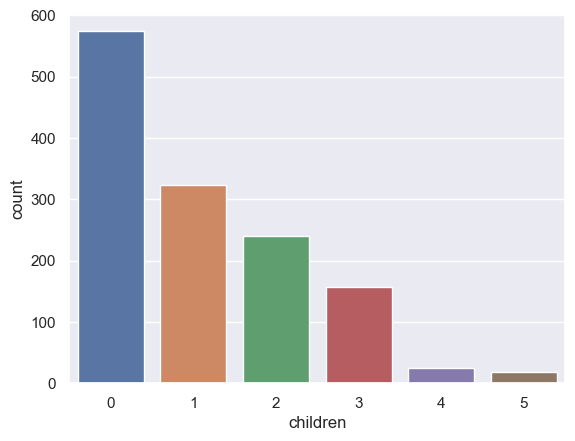

In [762]:
ax=sns.countplot(data = data,x="children")

In [763]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

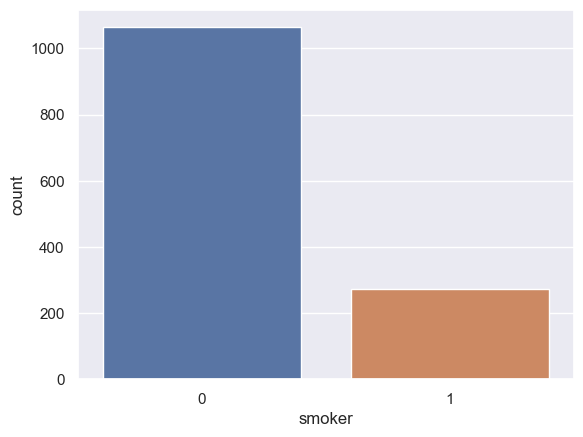

In [764]:
ax=sns.countplot(data = data,x="smoker")

In [765]:
data['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

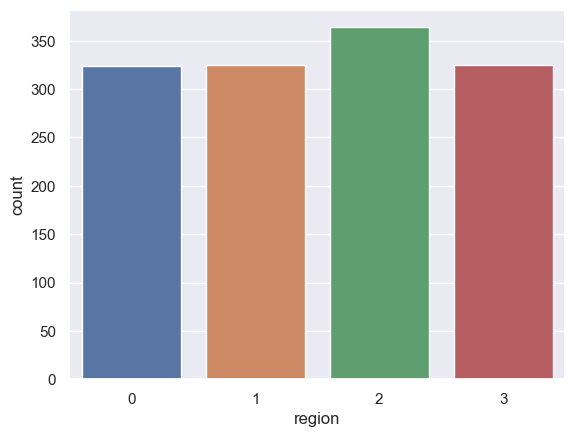

In [766]:
ax=sns.countplot(data = data,x="region")

In [767]:
data['region'].value_counts()

2    364
3    325
1    325
0    324
Name: region, dtype: int64

In [768]:
X= data.drop(columns='charges', axis=1)
Y = data['charges']

In [769]:
print(X)
print(Y)


      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


<AxesSubplot: >

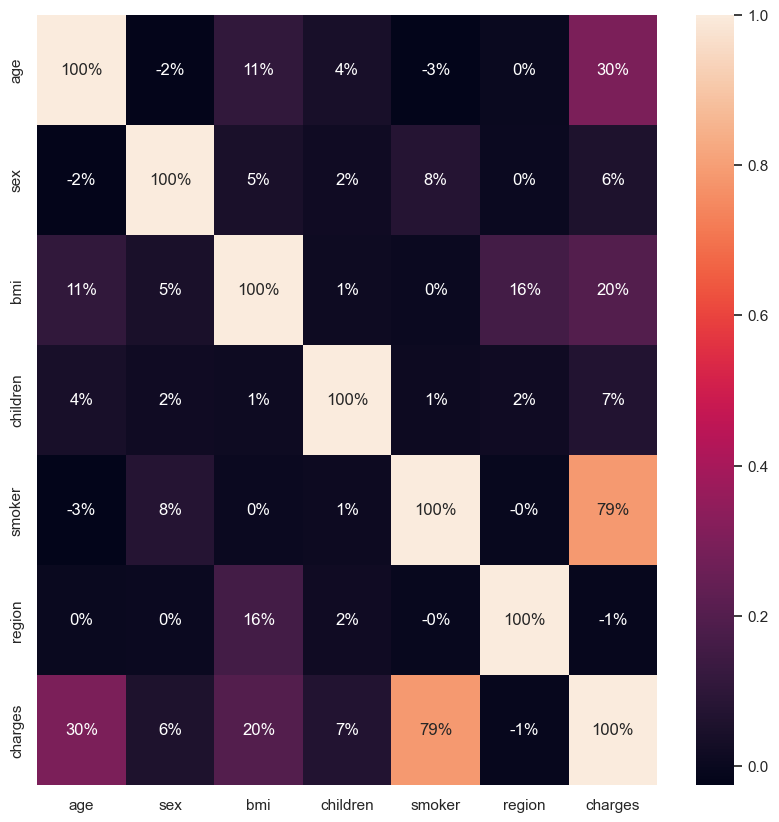

In [770]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, fmt=".0%")

In [771]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.2, random_state=2)
print(X.shape, X_test.shape,X_train.shape)

(1338, 6) (1071, 6) (267, 6)


In [772]:
model = LinearRegression()

In [773]:
model.fit(X_train,Y_train)

LinearRegression()

In [774]:
print(model.score(X_train, Y_train))
print(model.score(X_test, Y_test))

0.7043663613576312
0.7434583092302811


In [775]:
input_data = (  23  ,  0 , 34.400 ,    0  ,     0  ,     3)
input_data_as_array = np.asarray(input_data)
input_data_reshaped = input_data_as_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)

[4118.92737237]


c:\Users\Eng_Dina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
